# Classification - Pima Indians Diabetes
Ce notebook vise à prédire la présence de diabète à l'aide de données cliniques binaires.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Chargement des données
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Remplacement des 0 dans certaines colonnes par NaN (car ils sont physiologiquement impossibles)
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
# Imputation simple avec la médiane
df.fillna(df.median(numeric_only=True), inplace=True)

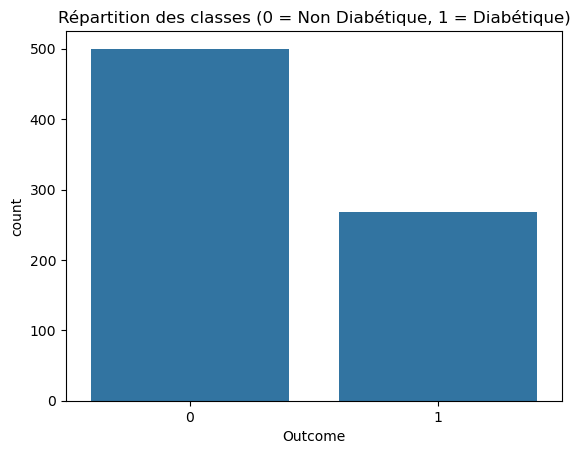

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


In [4]:
# Répartition des classes
sns.countplot(x='Outcome', data=df)
plt.title('Répartition des classes (0 = Non Diabétique, 1 = Diabétique)')
plt.show()

# Statistiques par classe
df.groupby('Outcome').mean()

In [5]:
# Split train / val / test
X = df.drop(columns='Outcome')
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [6]:
# Régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print('Accuracy :', accuracy_score(y_val, y_val_pred))
print('Precision:', precision_score(y_val, y_val_pred))
print('Recall   :', recall_score(y_val, y_val_pred))
print('F1-score :', f1_score(y_val, y_val_pred))

Accuracy : 0.7662337662337663
Precision: 0.7428571428571429
Recall   : 0.49056603773584906
F1-score : 0.5909090909090909


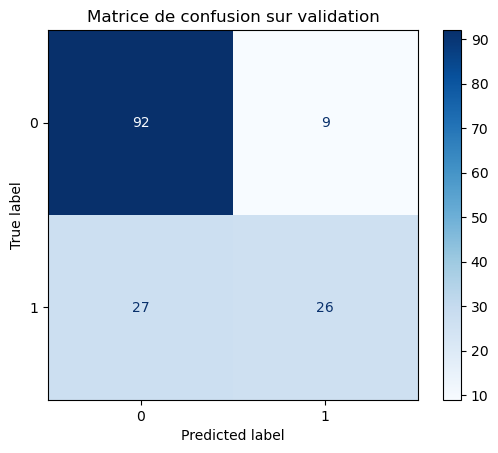

In [7]:
# Matrice de confusion
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Matrice de confusion sur validation')
plt.show()

In [8]:
# Test final
y_test_pred = model.predict(X_test)
print('Test Accuracy :', accuracy_score(y_test, y_test_pred))
print('Test F1-score :', f1_score(y_test, y_test_pred))

Test Accuracy : 0.7337662337662337
Test F1-score : 0.6238532110091743


## Conclusion

Le modèle de régression logistique donne une performance correcte pour la prédiction du diabète. Des améliorations pourraient inclure la gestion avancée du déséquilibre de classes (SMOTE, pondération), ou l'utilisation de modèles plus complexes comme les arbres de décision, forêts aléatoires ou XGBoost.